In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, metrics,cross_validation,preprocessing
from sklearn.cross_validation import train_test_split
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from time import time
from operator import itemgetter
from sklearn.tree import DecisionTreeClassifier

In [19]:
df=readDataFromWindowsFilesystem('C://Users//Sudipta//Desktop//ML//acadgild//pycodes//loan credit//cs-training.csv',',')

In [20]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### Removed 1st row - Not required

In [21]:
removeFeatures(df,'Unnamed: 0')

Dropped -  Unnamed: 0


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [22]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [24]:
df['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [25]:
findNumericalFetures(df)

There are 11 numerical variables
and they are..
['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [26]:
findDiscreteFetatures(df,10)

SeriousDlqin2yrs  values:  {0, 1}
There are 1 discrete variables


In [27]:
findContinuousFeatures(df)

There are 10 continuous variables
and they are..
['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [28]:
findCardinality(df)

No Categorial Variable found ! Hence no information on the cardinality.


In [29]:
classpercentDiscrete(df)

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64


In [30]:
IQR(df,'SeriousDlqin2yrs')

RevolvingUtilizationOfUnsecuredLines 0.5291788055
age 22.0
NumberOfTime30-59DaysPastDueNotWorse 0.0
DebtRatio 0.693179941
MonthlyIncome 4849.0
NumberOfOpenCreditLinesAndLoans 6.0
NumberOfTimes90DaysLate 0.0
NumberRealEstateLoansOrLines 2.0
NumberOfTime60-89DaysPastDueNotWorse 0.0
NumberOfDependents 1.0


In [31]:
detectOutlier(df,'quality')

SeriousDlqin2yrs : 0.0 | 6.68 | 6.68
RevolvingUtilizationOfUnsecuredLines : 0.0 | 0.51 | 0.51
age : 0.0 | 0.03 | 0.03
NumberOfTime30-59DaysPastDueNotWorse : 0.0 | 15.99 | 15.99
DebtRatio : 0.0 | 20.87 | 20.87
MonthlyIncome : 0.0 | 3.25 | 3.25
NumberOfOpenCreditLinesAndLoans : 0.0 | 2.65 | 2.65
NumberOfTimes90DaysLate : 0.0 | 5.56 | 5.56
NumberRealEstateLoansOrLines : 0.0 | 0.53 | 0.53
NumberOfTime60-89DaysPastDueNotWorse : 0.0 | 5.07 | 5.07
NumberOfDependents : 0.0 | 8.89 | 8.89


In [32]:
findUniqueValueCount(df)

RevolvingUtilizationOfUnsecuredLines    125728
DebtRatio                               114194
MonthlyIncome                            13594
age                                         86
NumberOfOpenCreditLinesAndLoans             58
NumberRealEstateLoansOrLines                28
NumberOfTimes90DaysLate                     19
NumberOfTime30-59DaysPastDueNotWorse        16
NumberOfDependents                          13
NumberOfTime60-89DaysPastDueNotWorse        13
SeriousDlqin2yrs                             2
dtype: int64


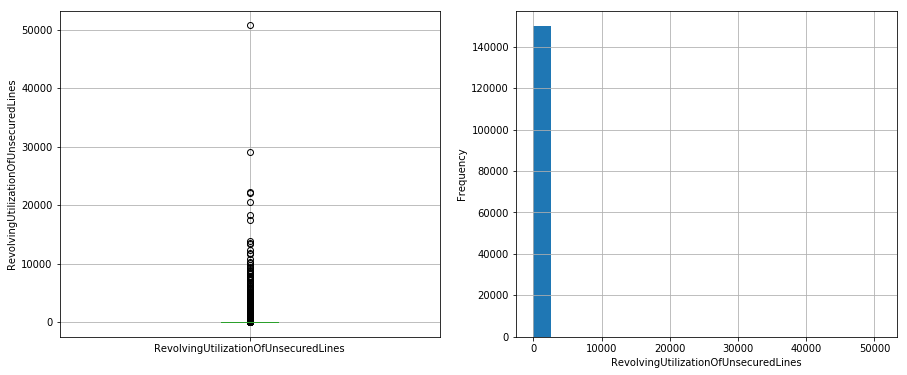

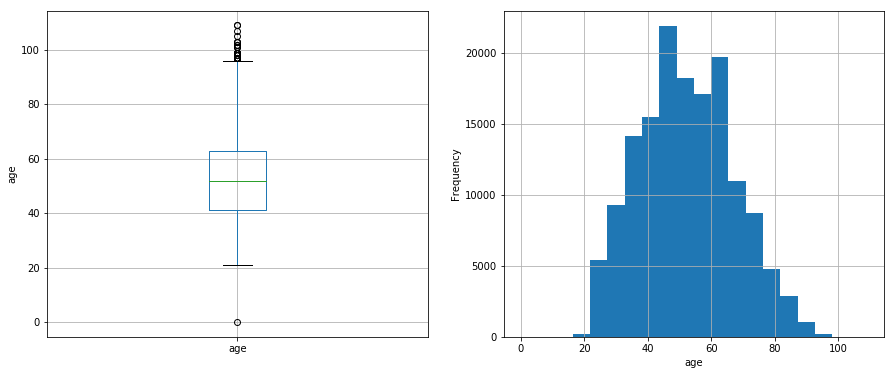

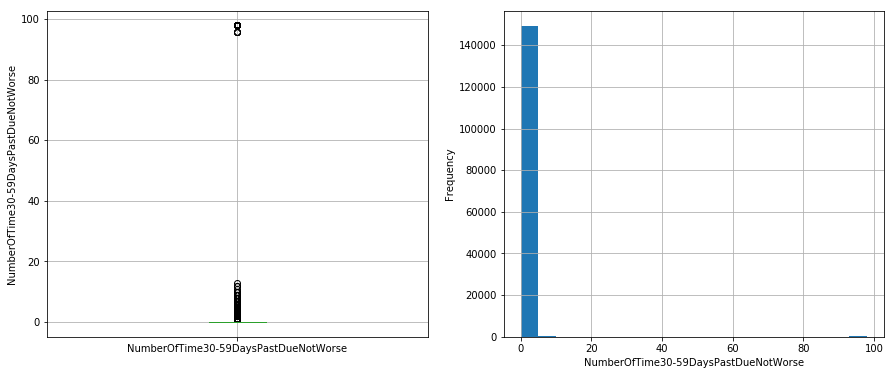

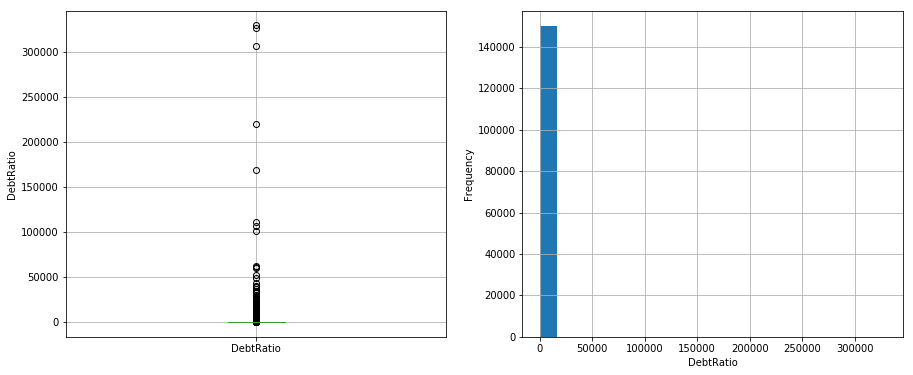

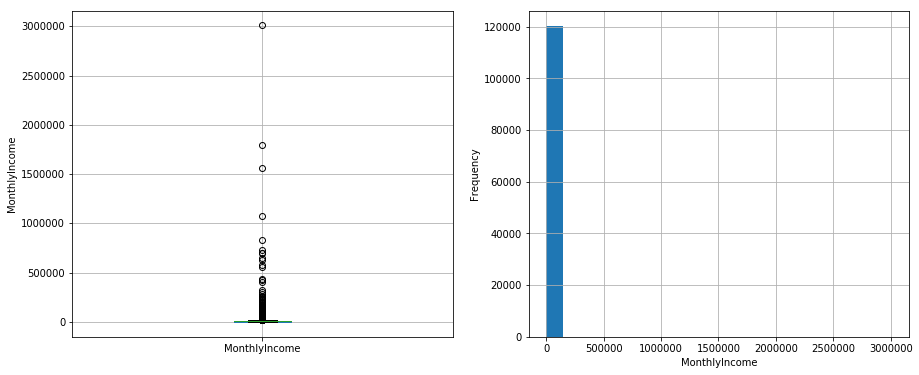

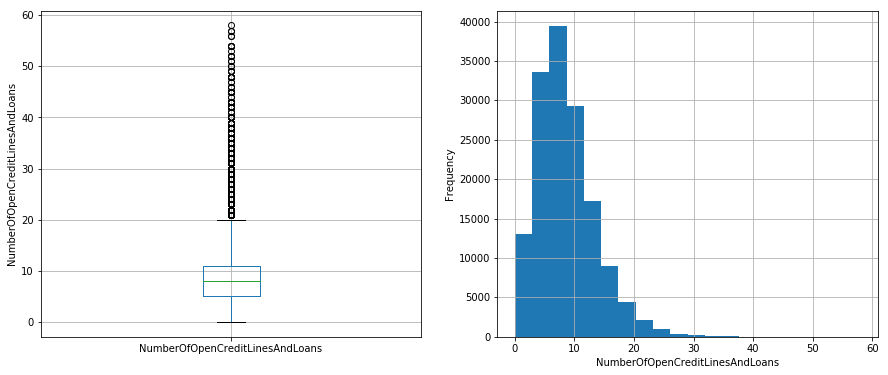

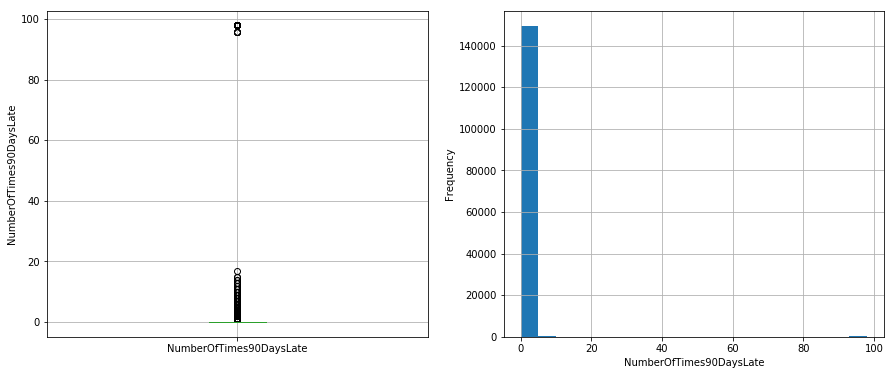

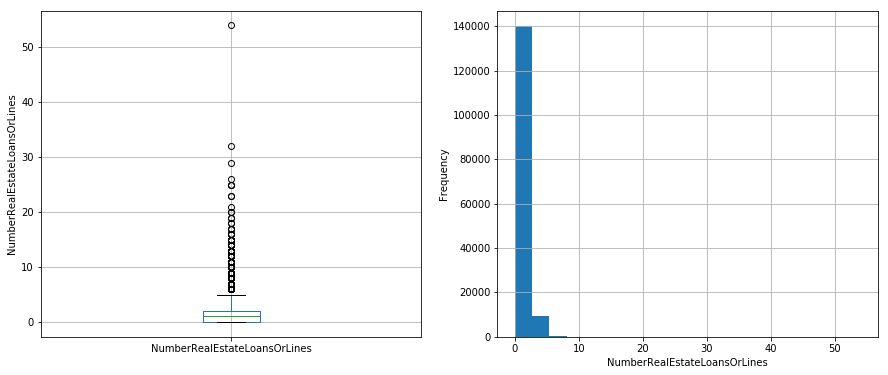

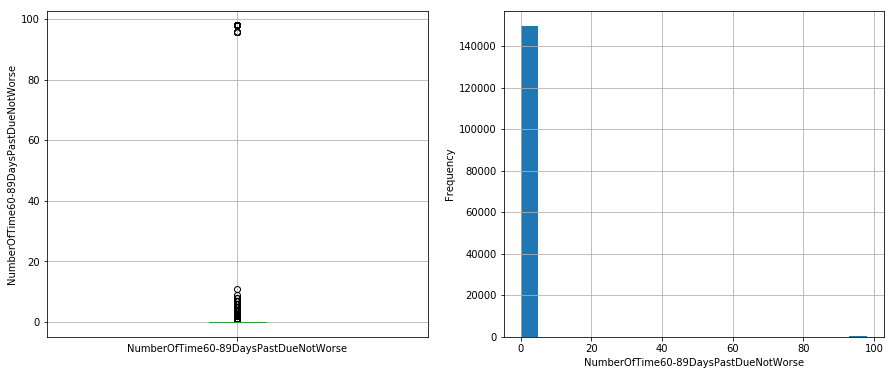

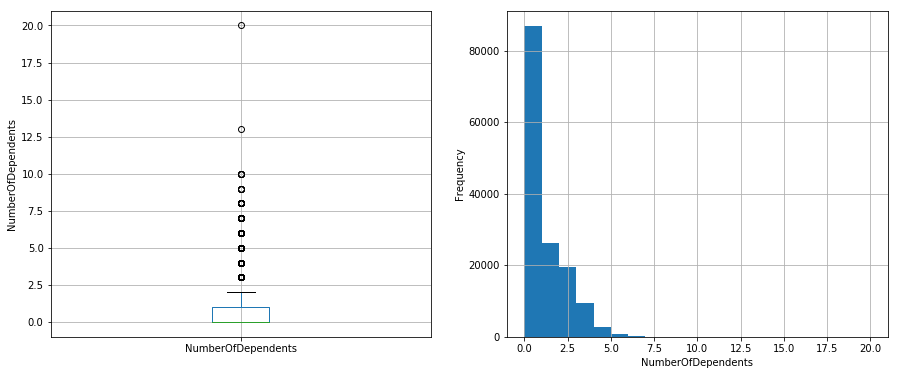

In [33]:
boxplotKDCContinuous(df)

In [34]:
missingPercent(df)

MonthlyIncome 0.198206666667
NumberOfDependents 0.02616


In [35]:
missingValueTable(df)

Selected dataframe has 11 columns. There are 2 columns that have missing values. 


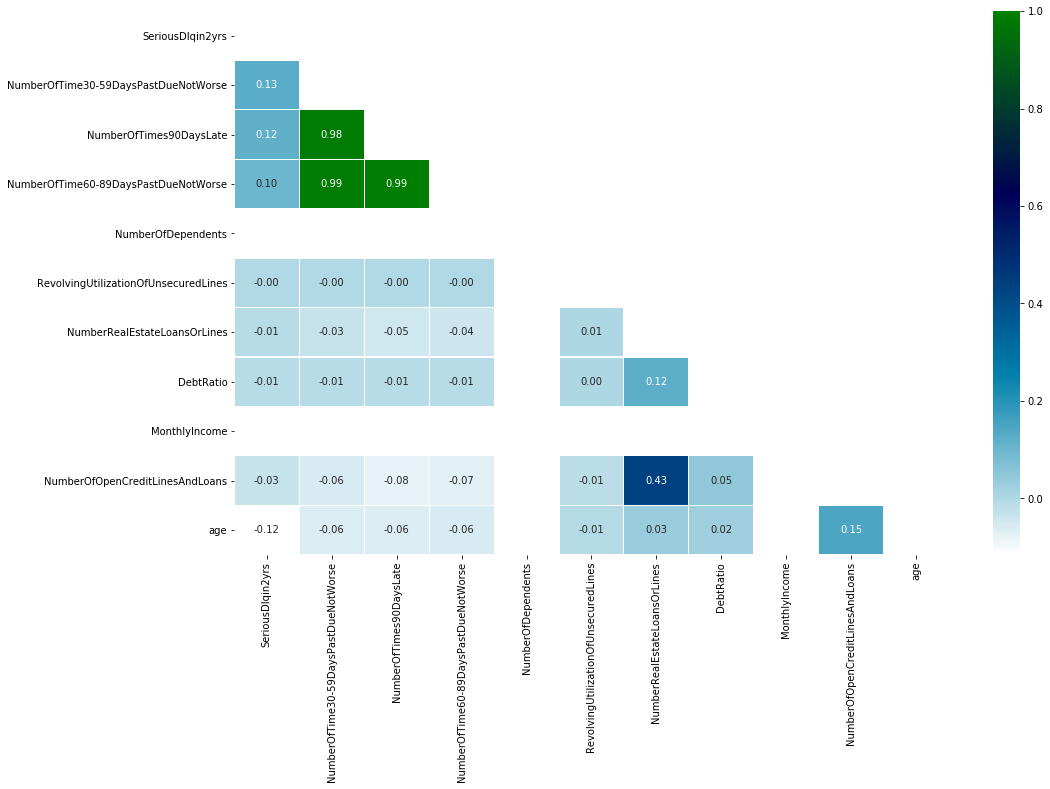

In [36]:
performCorrelation(df,'SeriousDlqin2yrs')

In [37]:
highest_lowest_corr(df,'SeriousDlqin2yrs')


Most positive correltion:

 age                                    -0.115386
NumberOfOpenCreditLinesAndLoans        -0.029669
MonthlyIncome                          -0.019746
DebtRatio                              -0.007602
NumberRealEstateLoansOrLines           -0.007038
RevolvingUtilizationOfUnsecuredLines   -0.001802
NumberOfDependents                      0.046048
NumberOfTime60-89DaysPastDueNotWorse    0.102261
NumberOfTimes90DaysLate                 0.117175
NumberOfTime30-59DaysPastDueNotWorse    0.125587
SeriousDlqin2yrs                        1.000000
Name: SeriousDlqin2yrs, dtype: float64

Most negative correltion:

 age                                    -0.115386
NumberOfOpenCreditLinesAndLoans        -0.029669
MonthlyIncome                          -0.019746
DebtRatio                              -0.007602
NumberRealEstateLoansOrLines           -0.007038
RevolvingUtilizationOfUnsecuredLines   -0.001802
NumberOfDependents                      0.046048
NumberOfTime60-89Days

In [38]:
df.dropna(inplace=True)

In [39]:
df.count()

SeriousDlqin2yrs                        120269
RevolvingUtilizationOfUnsecuredLines    120269
age                                     120269
NumberOfTime30-59DaysPastDueNotWorse    120269
DebtRatio                               120269
MonthlyIncome                           120269
NumberOfOpenCreditLinesAndLoans         120269
NumberOfTimes90DaysLate                 120269
NumberRealEstateLoansOrLines            120269
NumberOfTime60-89DaysPastDueNotWorse    120269
NumberOfDependents                      120269
dtype: int64

In [40]:
X_train, X_test, Y_train, Y_test = splitTrainTest(df,'SeriousDlqin2yrs')

(96215, 10)
(24054, 10)
(96215,)
(24054,)


In [41]:
lr = runLogisticRegression(X_train,Y_train)

Training Score:  0.930800810684
Test Score:  0.930198719548
Intercept:  [-0.03589914]
Model coef:  [[ -8.84824315e-05  -4.74819564e-02   8.77002559e-02  -2.04976482e-04
   -4.84759910e-05  -6.28860730e-03   2.03790385e-02   3.85587031e-02
   -6.86562571e-02   3.18698046e-02]]


In [42]:
train_report(lr,X_train,Y_train)

             precision    recall  f1-score   support

          0       0.93      1.00      0.96     89534
          1       0.60      0.01      0.02      6681

avg / total       0.91      0.93      0.90     96215



In [43]:
test_report(lr,X_test,Y_test)

             precision    recall  f1-score   support

          0       0.93      1.00      0.96     22378
          1       0.45      0.01      0.02      1676

avg / total       0.90      0.93      0.90     24054



In [1]:
#lr2 = logicticRegressionWithGridSearch(X_train,Y_train)

In [48]:
dt = decisionTreeWithGridSearch(X_train,Y_train)

Top Param: [mean: 0.93282, std: 0.00144, params: {'min_samples_split': 10, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}, mean: 0.93282, std: 0.00144, params: {'min_samples_split': 20, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}, mean: 0.93320, std: 0.00130, params: {'min_samples_split': 10, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}, mean: 0.93320, std: 0.00130, params: {'min_samples_split': 20, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}, mean: 0.93248, std: 0.00153, params: {'min_samples_split': 10, 'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10}, mean: 0.93246, std: 0.00155, params: {'min_samples_split': 20, 'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10}, mean: 0.93282, std: 0.00144, params: {'min_samples_split': 10, 'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10}, mean: 0.93282, std: 0.00144, params: {'min_samples_split': 20, 'criterion': 'entropy', 'max_depth': 2, 'min_sa

In [49]:
featureRaningUsingDecisionTree(X_train,dt)

                                feature  rank
6               NumberOfTimes90DaysLate  0.61
0  RevolvingUtilizationOfUnsecuredLines  0.16
2  NumberOfTime30-59DaysPastDueNotWorse  0.12
8  NumberOfTime60-89DaysPastDueNotWorse  0.08
1                                   age  0.00
3                             DebtRatio  0.00
4                         MonthlyIncome  0.00
5       NumberOfOpenCreditLinesAndLoans  0.00
7          NumberRealEstateLoansOrLines  0.00
9                    NumberOfDependents  0.00


C:\Users\Sudipta\Anaconda3\lib\site-packages\ipykernel\__main__.py:364: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


In [47]:
# Define Global variables
categorical=[]
numerical=[]
discrete=[]
continuous=[]

#Read Data from Windows
def readDataFromWindowsFilesystem(loc,delim):
    df = pd.read_csv(loc,sep=delim)
    return df

#Create In-memory Database Instance
def createDB(dbname):
    import sqlite3 as db
    from pandasql import sqldf
    conn = db.connect(dbname)
    return conn

#Remove features
def removeFeatures(df,col):
    df.drop(col,axis=1,inplace=True)
    print("Dropped - ",col)
    return df

### Categorical Feature Handling ####################
    
# Find categorical features
def findCategoricalFeatures(df):
    cat= [var for var in df.columns if df[var].dtype=='O']
    if len(cat) > 0:
        for x in cat:
            categorical.append(x)
    
    print('There are {} categorical variables'.format(len(categorical)))
    if len(cat) > 0:
        print('and they are..')
        print(categorical)

# Find cardinality for Cetegorical
def findCardinality(df):
    flag = 'Y'
    for var in categorical:
        print(var, ' contains ', len(df[var].unique()), ' labels')
        flag='N'
    
    if flag=='Y':
        print('No Categorial Variable found ! Hence no information on the cardinality.')
        


### Numerical Feature Handling ####################        

#Find Numerical Featues
def findNumericalFetures(df):
    num= [var for var in df.columns if df[var].dtype!='O']
    if len(num) > 0 :
        for x in num:
            numerical.append(x)
    print('There are {} numerical variables'.format(len(numerical)))
    if len(num) > 0:
        print('and they are..')
        print(numerical)
    
def highest_lowest_corr(df,target):
    correlation=df.corr()[target].sort_values()
    print("\nMost positive correltion:\n\n", correlation.tail(15))
    print("\nMost negative correltion:\n\n", correlation.head(15))
    
#Find discrete Features
def findDiscreteFetatures(df,threshold):
    for var in numerical:
        if len(df[var].unique()) < threshold:
            print(var, ' values: ', set(df[var]))
            discrete.append(var)
    print('There are {} discrete variables'.format(len(discrete)))

def IQR(df,target):
    for var in numerical:
        if var == target:
            continue
        IQR = df[var].describe()[6] - df[var].describe()[4]
        print(var,IQR)
        
def detectOutlier(df,target):
       for var in numerical:
            if var == target:
                continue
            IQR = df[var].describe()[6] - df[var].describe()[4]
            UCL = df[var].describe()[6] + (1.5 * IQR)
            LCL = df[var].describe()[4] - (1.5 * IQR)
            right = (df[(df[var] > UCL)].shape[0]/df.shape[0])*100
            left = (df[(df[var] < LCL)].shape[0]/df.shape[0])*100
            total = ((df[(df[var] > UCL)].shape[0]/df.shape[0])*100) + (df[(df[var] < LCL)].shape[0]/df.shape[0])*100 
            print(var,':',round(left,2),'|',round(right,2),'|',round(total,2))
 
    
def classpercentDiscrete(df):
    for var in discrete:
         print(df[var].value_counts() / np.float(len(df)))

# Find continuous Features
def findContinuousFeatures(df):
    conti = [var for var in  numerical if var not in discrete ]
    
    if len(conti) > 0 :
           for x in conti:
                continuous.append(x)
               
    print('There are {} continuous variables'.format(len(continuous)))
    if len(conti) > 0:
        print('and they are..')
        print(continuous)
    
# Plot bxplot and histogram 
def boxplotKDCContinuous(df):
    for var in continuous:
        if var == 'date':
            continue
        else:
            plt.figure(figsize=(15,6))
            plt.subplot(1, 2, 1)
            fig = df.boxplot(column=var)
            fig.set_title('')
            fig.set_ylabel(var)
            
            plt.subplot(1, 2, 2)
            fig = df[var].hist(bins=20)
            fig.set_ylabel('Frequency')
            fig.set_xlabel(var)

        plt.show()



# Find missing percentage
def missingPercent(df):
    missing=False
    for var in df.columns:
        if df[var].isnull().sum()>0:
            print(var, df[var].isnull().mean())
            missing=True
    
    for var in df.columns:
        if df[var].isnull().mean()>0.80:
            print(var, df[var].unique())
       
    if missing==False:
            print('No missing values')
            
def remove_zerovariance(df):
    sel = VarianceThreshold(threshold=0)
    sel.fit(df)  # fit finds the features with zero variance
    # get_support is a boolean vector that indicates which features are retained
    # if we sum over get_support, we get the number of features that are not constant
    sum(sel.get_support())
    # finally we can print the constant features
    print(
        len([
            x for x in df.columns
            if x not in df.columns[sel.get_support()]
        ]))

    [x for x in df.columns if x not in df.columns[sel.get_support()]]
    df = sel.transform(df)

# Findinf missing values in Table format
def missingValueTable(df):
        miss_val = df.isnull().sum()
        miss_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([miss_val,miss_val_percent],axis = 1)
        mis_val_table_relnamed_col = mis_val_table.rename(columns = {0: "Missing Value", 1 : "% of total Missing Values"})
        mis_val_table_relnamed_col = mis_val_table_relnamed_col[mis_val_table_relnamed_col.iloc[:,1] !=0].sort_values("% of total Missing Values",ascending = False).round(1)
        print("Selected dataframe has " + str(df.shape[1]) + " columns. There are " + str(mis_val_table_relnamed_col.shape[0]) + " columns that have missing values. ")
    
def performCorrelation(df,target):
    corrmat = df.corr()
    sort = corrmat.nlargest(len(df.columns),target)[target].index #Total no. of column (19) is plotted since correlation matrix as first cut is required for all data
    cmx = np.corrcoef(df[sort].values.T)
    mask = np.zeros_like(cmx, dtype=np.bool) 
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(16, 10))
    sns.heatmap(cmx,mask=mask, cbar=True,linewidths=0.05,vmax=1.0,annot=True, fmt=".2f",cmap="ocean_r",yticklabels=sort.values, xticklabels=sort.values)
    plt.show()
    

def highest_lowest_corr(df,target):
    correlation=df.corr()[target].sort_values()
    print("\nMost positive correltion:\n\n", correlation.tail(15))
    print("\nMost negative correltion:\n\n", correlation.head(15))
    
    
def splitTrainTest(df,targetVariable):
    x = df.drop(targetVariable, axis = 1)
    y = df[targetVariable]
    X_train, X_test, Y_train, Y_test =  train_test_split(x, y, test_size = 0.2, random_state = 5)
    print(X_train.shape)
    print(X_test.shape)
    print(Y_train.shape)
    print(Y_test.shape)
    return X_train, X_test, Y_train, Y_test
     
def scaleFeatures(X_train):
    training_vars = [var for var in X_train.columns]
    scaler = StandardScaler() 
    scaler.fit(X_train[training_vars]) 

def rare_imputation(variable,X_train,X_test):
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    frequent_cat = [x for x in temp.loc[temp>0.03].index.values]
    X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], 'Rare')
    X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], 'Rare')
       
    

def perform_rare_impute(type,):
    if type=='categorical':
        for var in categorical:
            rare_imputation(var,X_train,X_test)
    if type=='discrete':
        for var in discrete:
            print(var)
            rare_imputation(var,X_train,X_test)

def encodeVariable(var,df):
    df=pd.concat([df,pd.get_dummies(df[var],prefix=var,drop_first=True)],axis=1)
    removeFeatures(df,var)
    return df
    
def createQuantile(df,fieldName):
    dd = pd.qcut(df[fieldName],q=[0, .25, .5, .75, 1.])
    dd = pd.Categorical(dd)
    dd = pd.get_dummies(dd,prefix=fieldName,drop_first=True)
    df = pd.concat([df.drop(fieldName,axis=1,inplace=True),dd],axis=1)
    return df
    
def AdjustedRSquare(model,X,Y):
    YHat = model.predict(X)
    n,k = X.shape
    sse = np.sum(np.square(YHat-Y),axis=0)
    sst = np.sum(np.square(Y-np.mean(Y)),axis=0)
    R2 = 1- sse/sst
    adjR2 = R2-(1-R2)*(float(k)/(n-k-1))
    return adjR2, R2


def findUniqueValueCount(df):
        print(df.select_dtypes(include=['int64','float64']).apply(pd.Series.nunique,axis =0).sort_values(ascending=False) )

def runLinearRegression(X_train, X_test, Y_train, Y_test,rs):
    
    lm = LinearRegression()
    lm.fit(X_train, Y_train)
    print('Lenear Regressor: ')
    print(lm.score(X_train,Y_train))
    print(lm.score(X_test,Y_test))
    
    train_r_squared=np.round(lm.score(X_train,Y_train),2)
    print("Training Score --> ",train_r_squared)
    
    test_r_squared= np.round(lm.score(X_test,Y_test),2)
    print("Test Score --> ",test_r_squared)
    
    adjusted_r_squared = np.round( (1 - (1-test_r_squared)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)),2)
    print("Adj R^2 --> ", adjusted_r_squared)
    
    rs.update({"Classifier":"Linear Regression","TrainingScore":train_r_squared,"TestScore":test_r_squared,"AdjustedR^2":adjusted_r_squared})
    return rs

def runRandomForest(X_train, X_test, Y_train, Y_test,rs):
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, Y_train)
    print(rf_model.score(X_train,Y_train))
    print(rf_model.score(X_test,Y_test))
    
    train_r_squared=np.round(rf_model.score(X_train,Y_train),2)
    print("Training Score --> ",train_r_squared)
    
    test_r_squared= np.round(rf_model.score(X_test,Y_test),2)
    print("Test Score --> ",test_r_squared)
    
    adjusted_r_squared = np.round( (1 - (1-test_r_squared)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)),2)
    print("Adj R^2 --> ", adjusted_r_squared)
    
    rs.update({"Classifier":"RandomForest","TrainingScore":train_r_squared,"TestScore":test_r_squared,"AdjustedR^2":adjusted_r_squared})
    return rs

def runLogisticRegression(X_train,Y_train):
    lr = LogisticRegression()
    lr.fit(X_train,Y_train)
    print('Training Score: ',lr.score(X_train,Y_train))
    print('Test Score: ', lr.score(X_test,Y_test))
    print('Intercept: ',lr.intercept_)
    print('Model coef: ',lr.coef_)
    return lr
    
def train_report(model,X_train,Y_train):
    from sklearn.metrics import classification_report,confusion_matrix
    pred_quality = model.predict(X_train)
    confusion_matrix(Y_train,pred_quality)
    print(classification_report(Y_train,pred_quality))
    
def test_report(model,X_test,Y_test):
    from sklearn.metrics import classification_report,confusion_matrix
    pred_quality = model.predict(X_test)
    confusion_matrix(Y_test,pred_quality)
    print(classification_report(Y_test,pred_quality))
    
def GridSearch_BestParam(X, y, model, param_grid,cv=10):
    grid_search = GridSearchCV(model,
                              param_grid=param_grid,
                              cv=cv)
    start= time()
    grid_search.fit(X,y)
    top_params=grid_search.grid_scores_
    return top_params

def logicticRegressionWithGridSearch(X_train,Y_train):
    lr2 = LogisticRegression()
    param_grid = {"C": [0.001,0.05,0.1],
             #"penalty": ['l2','l1'],
              'solver':['newton-cg', 'lbfgs', 'liblinear']
             }
    top_para = GridSearch_BestParam(X_train,Y_train, lr2, param_grid, cv=10)
    top_score = sorted(top_para,key=itemgetter(1), reverse=True)
    paramCV = top_score[0].parameters
    model_final = LogisticRegression(C=paramCV['C'], 
                                solver=paramCV['solver'])
    
    print("Top Param: ",top_para)
    print("Top Score: ",top_score)
    model_final.fit(X_train,Y_train)
    print('Training Score: ',model_final.score(X_train,Y_train))
    print('Test Score: ', model_final.score(X_test,Y_test))
    print('Intercept: ',model_final.intercept_)
    print('Model coef: ',model_final.coef_)
    return model_final


def decisionTreeWithGridSearch(X_train,Y_train):
    dt = DecisionTreeClassifier() 
    param_grid = {"criterion": ["gini","entropy"],
             "min_samples_split": [10,20],
             "max_depth": [2,5,7],
             "min_samples_leaf":[10]}
    top_para = GridSearch_BestParam(X_train,Y_train, dt, param_grid, cv=10)
    print("Top Param:", top_para)
    top_score = sorted(top_para,key=itemgetter(1), reverse=True)
    print("Top Score:", top_score)
    paramCV = top_score[0].parameters
    best_dt = DecisionTreeClassifier(max_depth=paramCV['max_depth'], 
                                           min_samples_split=paramCV['min_samples_split'],
                                    min_samples_leaf=paramCV['min_samples_leaf'],
                                   criterion=paramCV['criterion'])
    best_dt.fit(X_train,Y_train)
    print('Training Score: ',best_dt.score(X_train,Y_train))
    print('Test Score: ', best_dt.score(X_test,Y_test))
    best_dt.feature_importances_
    return best_dt 

def featureRaningUsingDecisionTree(X_train,model):
    temp = pd.DataFrame()
    temp['feature'] = pd.Series(X_train.columns)
    temp['rank'] = np.round(model.feature_importances_,2)
    print(temp.sort_index(by='rank',ascending=False))